In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})
import matplotlib as mpl
from sklearn.decomposition import PCA

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### PCA (주성분 분석)

In [3]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
#칼로리, 식습관 운동습관과 그에 따른 체형 데이터를
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [4]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [7]:
X=df[['calory','breakfast','lunch','dinner','exercise']]
X
Y=df[["body_shape"]]
Y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [10]:
# 표준화 (평균 0, 표준편차 1인 값으로 변환)
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(X)
print(x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
# 공분산 행렬
# 피처가 컬럼에 있는데 row 바꾸기 위해 변환
features=x_std.T # (5,10)
features # 각 열은 개인 데이터를 의미
cov_matrix=np.cov(features) # 5개의 feature에 대한 공분산 행렬 (5,5)
print(cov_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [20]:
# 공분산 행렬로부터 아이겐벡터와 아이겐밸류 추출
eig_vals, eig_vecs=np.linalg.eig(cov_matrix)
print("고유벡터 : %s" % eig_vecs)
print("고유값 : %s" % eig_vals)
# 고유벡터는 해당 행렬이 벡터에 작용하는 힘의 방향
# 공분산 행렬의 고유벡터는? 데이터가 어느 방향으로 분산되어 있는지를 나타내는 것
# 고유값? 고유벡터에 해당하는 상관계수
# 공분산 행렬의 고유값? 각 축에 대한 공분산 값
# 결국, 고유값이 큰 순서대로 고유 벡터를 나열하면, 중요한 주성분부터 추출이 됨
# 람다 3인 고유값을 축으로 데이터를 정사영하면 보다 의미있는 차원 축소를 할 수 있음
#  a      x         람다    x
# 2 1    0.7         3    0.7
# 1 2    0.7    =         0.7

#  a      x         람다    x
# 2 1    0.7         1    0.7
# 1 2   -0.7    =        -0.7

고유벡터 : [[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]
고유값 : [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [23]:
# 본래의 데이터로부터 얼마정도의 의미를 나타낼 수 있는지를 계산
eig_vals[0]/sum(eig_vals) #73% 정보를 표현

0.7318321731427544

In [25]:
# 전체 데이터의 73% 정보가 담겨있는 데이터 추출
# (10,5)행 데이터가 1차원(10,1)으로 차원 축소된 데이터 
projected_X=x_std.dot(eig_vecs.T[0])
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [26]:
res=pd.DataFrame(projected_X, columns=['PC1'])
res["yaxis"]=0.0
res['label']=Y
res

,PC1,yaxis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


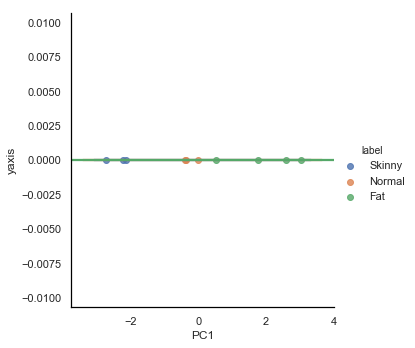

In [27]:
# 73% 정보가 담겨져있는 1차원 데이터를 시각화
sns.lmplot('PC1','yaxis', data=res, hue='label')

In [33]:
df=pd.read_csv("data/HR_comma_sep.csv")
df.shape #(14999, 10)
df.info() # null이 없고 left 변수(1:이직, 0:이직x)가 target value 임
# 열의 이름만 뽑아서 리스트로 변환
columns_names=df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [35]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [36]:
# 상관계수 
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


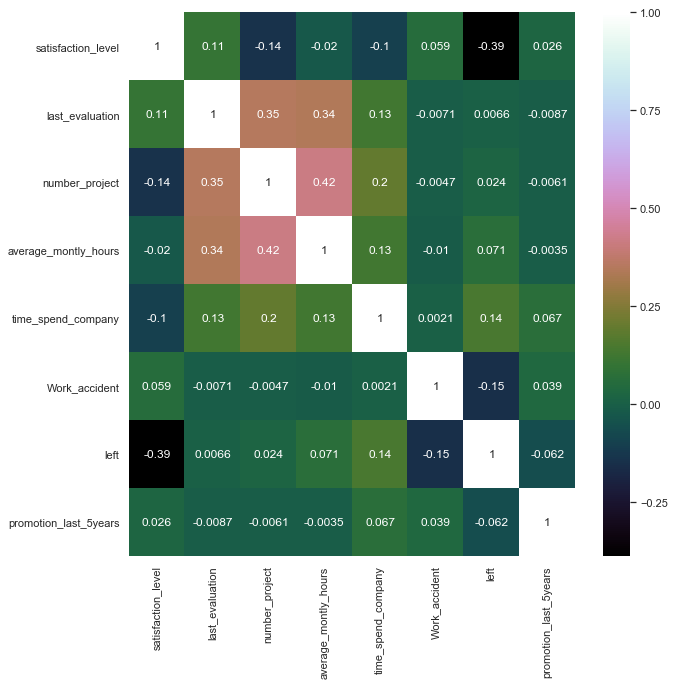

In [39]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap="cubehelix")

#### 데이터 전처리 과정

In [40]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [42]:
df.sales.unique() # 부서를 나타냄

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [45]:
# 부서별로 각 컬럼에 대한 합계 
sales=df.groupby("sales").sum()
sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


In [48]:
# 부서별로 각 컬럼에 대한 평균
groupby_sales=df.groupby("sales").mean()
groupby_sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [50]:
# satisfaction_level이 left 변수와 상관관계가 큰 변수이므로 각 sales로 구분하여 열로 추출한 후, 여러 연산에 활용
groupby_sales.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [53]:
# satisfaction_level을 sales 컬럼을 기준으로 구분
IT=groupby_sales["satisfaction_level"].IT
RandD=groupby_sales["satisfaction_level"].RandD
accounting=groupby_sales["satisfaction_level"].accounting
hr=groupby_sales["satisfaction_level"].hr
management=groupby_sales["satisfaction_level"].management
marketing=groupby_sales["satisfaction_level"].marketing
product_mng=groupby_sales["satisfaction_level"].product_mng
sales=groupby_sales["satisfaction_level"].sales
support=groupby_sales["satisfaction_level"].support
technical=groupby_sales["satisfaction_level"].technical
technical

0.6078970588235295

In [56]:
df.head()
df_drop=df.drop(labels=['sales','salary'],axis=1)
df_drop.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [61]:
# left 열을 맨 앞으로 이동시키기
cols=df_drop.columns.tolist()
cols
cols.index('left') #6
cols.insert(0,cols.pop(cols.index('left'))) # left 열이 0번으로 이동하게 됨
cols

['left',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [64]:
df_drop=df_drop.reindex(columns=cols) # cols릴 기준으로 인덱스가 변화됨
df_drop.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1,0.38,0.53,2,157,3,0,0
1,1,0.80,0.86,5,262,6,0,0
2,1,0.11,0.88,7,272,4,0,0
3,1,0.72,0.87,5,223,5,0,0
4,1,0.37,0.52,2,159,3,0,0


In [70]:
X=df_drop.iloc[:,1:8].values
Y=df_drop.iloc[:,0].values
X
Y
np.shape(X)
np.shape(Y)

(14999,)

In [73]:
# 표준화
X_std=StandardScaler().fit_transform(X)

In [78]:
# 공분산 행렬식을 직접 쓰기
mean_vec=np.mean(X_std,axis=0)
mean_vec
cov_mat=(X_std-mean_vec).T.dot(X_std-mean_vec)/(X_std.shape[0]-1)
cov_mat

array([[ 1.00006668,  0.10502822, -0.14297912, -0.02004945, -0.1008728 ,
         0.05870115,  0.02560689],
       [ 0.10502822,  1.00006668,  0.34935588,  0.33976445,  0.1315995 ,
        -0.00710476, -0.00868435],
       [-0.14297912,  0.34935588,  1.00006668,  0.41723845,  0.19679901,
        -0.00474086, -0.00606436],
       [-0.02004945,  0.33976445,  0.41723845,  1.00006668,  0.12776343,
        -0.01014356, -0.00354465],
       [-0.1008728 ,  0.1315995 ,  0.19679901,  0.12776343,  1.00006668,
         0.00212056,  0.06743742],
       [ 0.05870115, -0.00710476, -0.00474086, -0.01014356,  0.00212056,
         1.00006668,  0.03924805],
       [ 0.02560689, -0.00868435, -0.00606436, -0.00354465,  0.06743742,
         0.03924805,  1.00006668]])

In [77]:
np.cov(X_std.T)

array([[ 1.00006668,  0.10502822, -0.14297912, -0.02004945, -0.1008728 ,
         0.05870115,  0.02560689],
       [ 0.10502822,  1.00006668,  0.34935588,  0.33976445,  0.1315995 ,
        -0.00710476, -0.00868435],
       [-0.14297912,  0.34935588,  1.00006668,  0.41723845,  0.19679901,
        -0.00474086, -0.00606436],
       [-0.02004945,  0.33976445,  0.41723845,  1.00006668,  0.12776343,
        -0.01014356, -0.00354465],
       [-0.1008728 ,  0.1315995 ,  0.19679901,  0.12776343,  1.00006668,
         0.00212056,  0.06743742],
       [ 0.05870115, -0.00710476, -0.00474086, -0.01014356,  0.00212056,
         1.00006668,  0.03924805],
       [ 0.02560689, -0.00868435, -0.00606436, -0.00354465,  0.06743742,
         0.03924805,  1.00006668]])

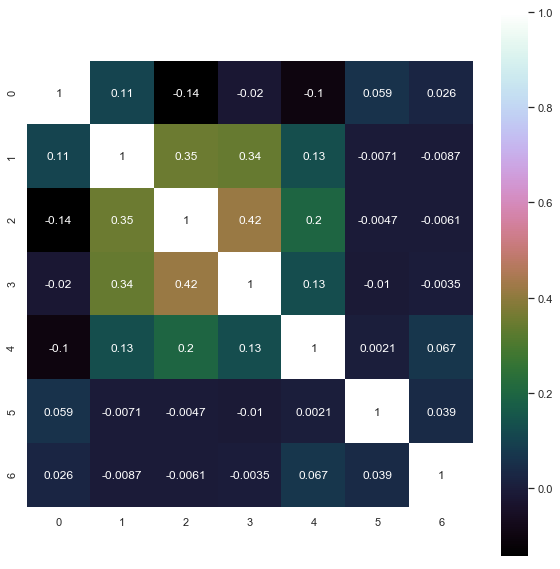

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(cov_mat,annot=True, cmap="cubehelix", square=True)

In [84]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
print("아이겐 벡터:\n %s" % eig_vecs)
print("아이겐 값:\n %s" % eig_vals)

아이겐 벡터:
 [[-0.08797699 -0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [ 0.50695734  0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [ 0.5788351  -0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [ 0.54901653  0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [ 0.31354922  0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [-0.01930249  0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [ 0.00996933  0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]
아이겐 값:
 [1.83017431 0.54823098 0.63363587 0.84548166 1.12659606 0.95598647
 1.06036136]


In [93]:
eig_pairs=[(eig_vals[i],eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs

[(1.830174313875499,
  array([-0.08797699,  0.50695734,  0.5788351 ,  0.54901653,  0.31354922,
         -0.01930249,  0.00996933])),
 (0.5482309765420602,
  array([-0.29189921,  0.30996609, -0.77736008,  0.45787675,  0.05287224,
          0.04433104,  0.00391698])),
 (0.633635874483021,
  array([ 0.27784886, -0.70780994, -0.00657105,  0.63497294,  0.12200054,
         -0.03622859, -0.04873036])),
 (0.8454816637143464,
  array([ 0.33637135,  0.07393548, -0.19677589, -0.25170987,  0.78782241,
         -0.05762997, -0.39411153])),
 (1.1265960639915473,
  array([ 0.79752505,  0.33180877, -0.10338032,  0.10388959, -0.28404472,
          0.37489883,  0.10557298])),
 (0.9559864740066265,
  array([ 0.26786864,  0.1101505 , -0.10336241, -0.01034922,  0.04036861,
         -0.8048393 ,  0.50589173])),
 (1.0603613622840846,
  array([-0.09438973, -0.13499526, -0.02293518, -0.10714981,  0.42547869,
          0.45245222,  0.75836313]))]

In [97]:
# 내림차순 정렬
eig_pairs.sort(key=lambda x:x[0], reverse=True)
eig_pairs
for i in eig_pairs:
    print(i[0])
    
tot=sum(eig_vals)

var_exp=[(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
var_exp

1.830174313875499
1.1265960639915473
1.0603613622840846
0.9559864740066265
0.8454816637143464
0.633635874483021
0.5482309765420602


[26.143604201713195,
 16.093156465426482,
 15.147009525908112,
 13.656039104655914,
 12.077504207316458,
 9.051337561072025,
 7.831348933907803]

In [99]:
# 사이킷런의 PCA 라이브러리
pca=PCA().fit(X_std)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [100]:
pca.explained_variance_ratio_

array([0.26143604, 0.16093156, 0.1514701 , 0.13656039, 0.12077504,
       0.09051338, 0.07831349])

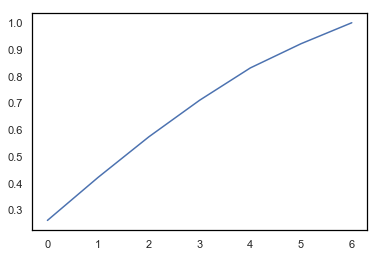

In [101]:
# 누적합 그래프를 보고 예를 들어 데이터 90%를 표현하기 위해서는 몇 차원까지 나타내야하는지 알 수 있음
# 7차원 데이터가 90%를 표현하기 위해서는 5차원까지는 나타내야함
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [105]:
# 6차원으로 축소
sk_pca=PCA(n_components=6)
y_sk=sk_pca.fit_transform(X_std) # 표준화된 데이터 인수로 주기
y_sk # 6차원으로 축소된 데이터 출력
# y_sk.shape # (14999, 6)

array([[-1.90035018, -1.12083103, -0.0797787 ,  0.03228437, -0.07256447,
         0.06063013],
       [ 2.1358322 ,  0.2493369 ,  0.0936161 ,  0.50676925,  1.2487747 ,
        -0.61378158],
       [ 3.05891625, -1.68312693, -0.301682  , -0.4488635 , -1.12495888,
         0.29066929],
       ...,
       [-2.0507165 , -1.182032  , -0.04594506,  0.02441143, -0.01553247,
         0.24980658],
       [ 2.91418496, -1.42752606, -0.36333357, -0.31517759, -0.97107375,
         0.51444624],
       [-1.91543672, -1.17021407, -0.07024077,  0.01486762, -0.09545357,
         0.01773844]])

In [114]:
pd.DataFrame({"A": range(1,11)})

,A
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10
